In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
App_df =pd.read_csv("application_data.csv")
App_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
App_df.shape

(247312, 122)

In [ ]:
App_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247312 entries, 0 to 247311
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    247312 non-null  int64  
 1    TARGET                        247312 non-null  int64  
 2    NAME_CONTRACT_TYPE            247312 non-null  object 
 3    CODE_GENDER                   247312 non-null  object 
 4    FLAG_OWN_CAR                  247312 non-null  object 
 5    FLAG_OWN_REALTY               247312 non-null  object 
 6    CNT_CHILDREN                  247312 non-null  int64  
 7    AMT_INCOME_TOTAL              247312 non-null  float64
 8    AMT_CREDIT                    247312 non-null  float64
 9    AMT_ANNUITY                   247300 non-null  float64
 10   AMT_GOODS_PRICE               247101 non-null  float64
 11   NAME_TYPE_SUITE               246304 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
App_df.isna().sum().sort_values(ascending=False).head(20)

COMMONAREA_MODE             172939
COMMONAREA_AVG              172939
COMMONAREA_MEDI             172939
NONLIVINGAPARTMENTS_MODE    171797
NONLIVINGAPARTMENTS_AVG     171797
NONLIVINGAPARTMENTS_MEDI    171797
FONDKAPREMONT_MODE          169240
LIVINGAPARTMENTS_MEDI       169188
LIVINGAPARTMENTS_AVG        169188
LIVINGAPARTMENTS_MODE       169188
FLOORSMIN_MODE              167927
FLOORSMIN_AVG               167927
FLOORSMIN_MEDI              167927
YEARS_BUILD_MEDI            164578
YEARS_BUILD_MODE            164578
YEARS_BUILD_AVG             164578
OWN_CAR_AGE                 163352
LANDAREA_MEDI               147084
LANDAREA_MODE               147084
LANDAREA_AVG                147084
dtype: int64

In [ ]:
# checking 50% length of data set to remove those set of columns from the dataset

a=len(App_df)/2
a

123656.0

In [ ]:
#Removing column containing more than 50 % of Null value

App_df.columns[App_df.isnull().sum() < a ]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [ ]:
App_df = App_df[App_df.columns[App_df.isnull().sum() < a ]] 

In [ ]:
## After removing columns - 81 columns are left
App_df.shape

(247312, 81)

In [ ]:
App_df.isna().sum().sort_values(ascending=False)

FLOORSMAX_AVG                   123257
FLOORSMAX_MODE                  123257
FLOORSMAX_MEDI                  123257
YEARS_BEGINEXPLUATATION_AVG     120800
YEARS_BEGINEXPLUATATION_MODE    120800
                                 ...  
CNT_CHILDREN                         0
TARGET                               0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
SK_ID_CURR                           0
Length: 81, dtype: int64

In [ ]:
# Now lets extract categorical and numerical columns
##Below are numerical columns

App_df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [ ]:
#Below are categorical Columns

list(set(App_df.columns) - set(App_df.describe().columns))

['ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [ ]:
# Defining a function to find out the number and percentage of missing values in a Dataframe

def missing(App_df):
    
    mv_sum = App_df.isnull().sum()   #calculating the sum of NAs
    
    mv_per = (App_df.isnull().sum()*100/len(App_df)).round(1)  #Caculating % of NAs
    
    mi = pd.concat([mv_sum, mv_per],axis=1) # Adding to a DF
    
    mi.columns = ['Total', '% of NAN values'] # Renaming columns
    
    mi.sort_values(by = '% of NAN values',ascending=False )
           
        # Sort the table by percentage of missing descending
        
    mi = mi[mi.iloc[:,1] != 0].sort_values('% of NAN values', ascending=False)
    
    return mi
    

In [ ]:
# Checking the missing values in Application Dataframe
# Need to remove null values from column having null values more than 30%
missing(App_df).head(15)

Total  % of NAN values
FLOORSMAX_AVG                 123257             49.8
FLOORSMAX_MODE                123257             49.8
FLOORSMAX_MEDI                123257             49.8
YEARS_BEGINEXPLUATATION_AVG   120800             48.8
YEARS_BEGINEXPLUATATION_MODE  120800             48.8
YEARS_BEGINEXPLUATATION_MEDI  120800             48.8
TOTALAREA_MODE                119546             48.3
EMERGENCYSTATE_MODE           117379             47.5
OCCUPATION_TYPE                77561             31.4
EXT_SOURCE_3                   49116             19.9
AMT_REQ_CREDIT_BUREAU_HOUR     33441             13.5
AMT_REQ_CREDIT_BUREAU_QRT      33441             13.5
AMT_REQ_CREDIT_BUREAU_MON      33441             13.5
AMT_REQ_CREDIT_BUREAU_WEEK     33441             13.5
AMT_REQ_CREDIT_BUREAU_DAY      33441             13.5

In [ ]:
# FLOORSMAX_AVG having most amount of null values

App_df['FLOORSMAX_AVG'].describe() 

count    124055.000000
mean          0.226069
std           0.144595
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

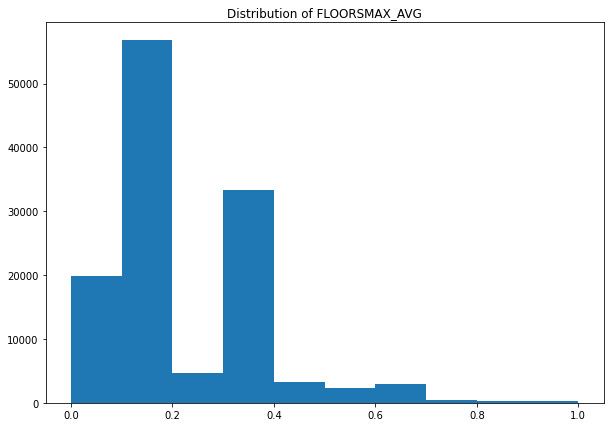

In [ ]:
# ploting graph to check difference

plt.figure(figsize=(10,7))
plt.hist(App_df['FLOORSMAX_AVG'],bins=10)
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()

In [ ]:
# Replacing Null values with mean in FLOORSMAX_AVG

App_df['FLOORSMAX_AVG'] = App_df['FLOORSMAX_AVG'].fillna(round(App_df['FLOORSMAX_AVG'].mean(),2))


In [ ]:
#recheck null values

App_df['FLOORSMAX_AVG'].isna().sum()

0

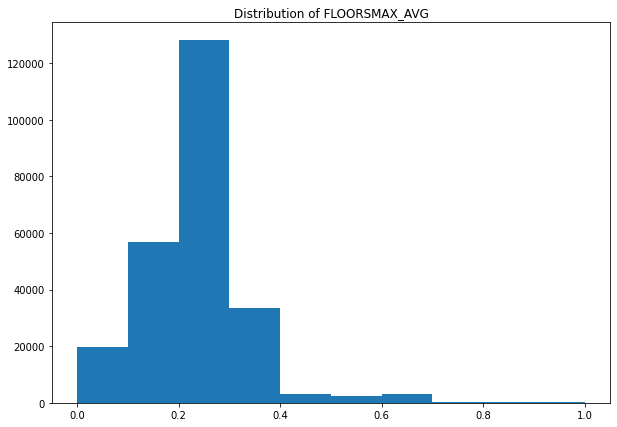

In [ ]:
#Plotting graph after zero null values

plt.figure(figsize=(10,7))
plt.hist(App_df['FLOORSMAX_AVG'])
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()  # We can see a normal distribution for FLOORSMAX_AVG

In [ ]:
# Again checking missing values and as we can see FLOORSMAX_AVG is not there.
missing(App_df).head(15) 

Total  % of NAN values
FLOORSMAX_MODE                123257             49.8
FLOORSMAX_MEDI                123257             49.8
YEARS_BEGINEXPLUATATION_AVG   120800             48.8
YEARS_BEGINEXPLUATATION_MODE  120800             48.8
YEARS_BEGINEXPLUATATION_MEDI  120800             48.8
TOTALAREA_MODE                119546             48.3
EMERGENCYSTATE_MODE           117379             47.5
OCCUPATION_TYPE                77561             31.4
EXT_SOURCE_3                   49116             19.9
AMT_REQ_CREDIT_BUREAU_HOUR     33441             13.5
AMT_REQ_CREDIT_BUREAU_QRT      33441             13.5
AMT_REQ_CREDIT_BUREAU_MON      33441             13.5
AMT_REQ_CREDIT_BUREAU_WEEK     33441             13.5
AMT_REQ_CREDIT_BUREAU_DAY      33441             13.5
AMT_REQ_CREDIT_BUREAU_YEAR     33441             13.5

In [ ]:
#Extracting column heading of the columns that have null values

cat_var = App_df[missing(App_df).index].select_dtypes('object')
cat_var.columns

Index(['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE'], dtype='object')

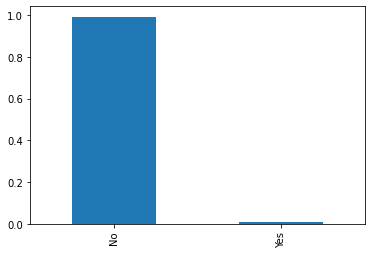

In [ ]:
#Plotting EMERGENCYSTATE_MODE to understand the data
App_df["EMERGENCYSTATE_MODE"].value_counts(normalize=True).plot(kind = 'bar');

In [ ]:
# categorical columns are imputed by mode, so imputing all by mode

In [ ]:

App_df["EMERGENCYSTATE_MODE"]= App_df["EMERGENCYSTATE_MODE"].fillna(App_df["EMERGENCYSTATE_MODE"].mode()[0])
App_df["EMERGENCYSTATE_MODE"].value_counts()

No     245464
Yes      1848
Name: EMERGENCYSTATE_MODE, dtype: int64

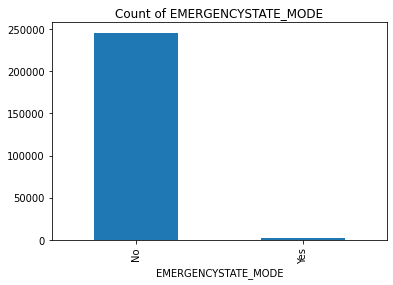

In [ ]:
#Replotting graph after replacing the null values with mode

App_df["EMERGENCYSTATE_MODE"].value_counts().plot(kind ='bar')
plt.title("Count of EMERGENCYSTATE_MODE")
plt.xlabel("EMERGENCYSTATE_MODE")
plt.show()

In [ ]:
missing(App_df).head(13) # Rechecking again - Emergency Mode is not in table

Total  % of NAN values
FLOORSMAX_MODE                123257             49.8
FLOORSMAX_MEDI                123257             49.8
YEARS_BEGINEXPLUATATION_AVG   120800             48.8
YEARS_BEGINEXPLUATATION_MODE  120800             48.8
YEARS_BEGINEXPLUATATION_MEDI  120800             48.8
TOTALAREA_MODE                119546             48.3
EXT_SOURCE_3                   49116             19.9
AMT_REQ_CREDIT_BUREAU_YEAR     33441             13.5
AMT_REQ_CREDIT_BUREAU_HOUR     33441             13.5
AMT_REQ_CREDIT_BUREAU_QRT      33441             13.5
AMT_REQ_CREDIT_BUREAU_MON      33441             13.5
AMT_REQ_CREDIT_BUREAU_WEEK     33441             13.5
AMT_REQ_CREDIT_BUREAU_DAY      33441             13.5

In [ ]:
# Doing same on Occupation_type

App_df['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
247307       Managers
247308       Laborers
247309    Sales staff
247310       Laborers
247311       Laborers
Name: OCCUPATION_TYPE, Length: 247312, dtype: object

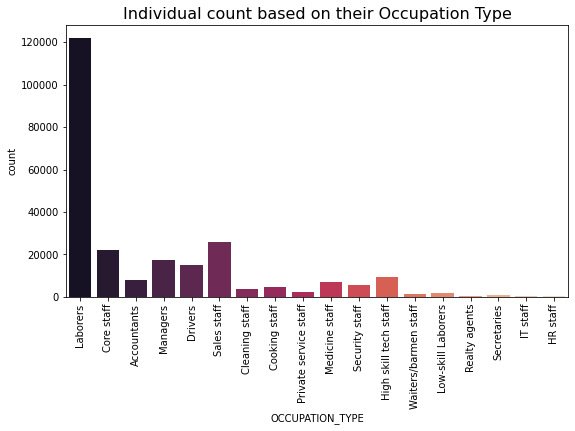

In [ ]:
#Using countplot to understand the OCCUPATION_TYPE

plt.figure(figsize=(9,5))
sns.countplot(x = 'OCCUPATION_TYPE', data=App_df,palette='rocket')
plt.title("Individual count based on their Occupation Type",size=16)
plt.xticks(rotation = 90);

In [ ]:
# as their are apprx 31 % null values in the Occupation Type, checking the mode of the column

App_df['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [ ]:
# We will be replacing categorical column with mode

cols = list(set(App_df.columns) - set(App_df.describe().columns))
App_df[cols]= App_df[cols].fillna(App_df.mode().iloc[0])

In [ ]:
missing(App_df) # Checking the missing values of application data using function

Total  % of NAN values
FLOORSMAX_MODE                123257             49.8
FLOORSMAX_MEDI                123257             49.8
YEARS_BEGINEXPLUATATION_AVG   120800             48.8
YEARS_BEGINEXPLUATATION_MODE  120800             48.8
YEARS_BEGINEXPLUATATION_MEDI  120800             48.8
TOTALAREA_MODE                119546             48.3
EXT_SOURCE_3                   49116             19.9
AMT_REQ_CREDIT_BUREAU_YEAR     33441             13.5
AMT_REQ_CREDIT_BUREAU_HOUR     33441             13.5
AMT_REQ_CREDIT_BUREAU_QRT      33441             13.5
AMT_REQ_CREDIT_BUREAU_MON      33441             13.5
AMT_REQ_CREDIT_BUREAU_WEEK     33441             13.5
AMT_REQ_CREDIT_BUREAU_DAY      33441             13.5
OBS_30_CNT_SOCIAL_CIRCLE         814              0.3
DEF_60_CNT_SOCIAL_CIRCLE         814              0.3
OBS_60_CNT_SOCIAL_CIRCLE         814              0.3
DEF_30_CNT_SOCIAL_CIRCLE         814              0.3
EXT_SOURCE_2                     536              0.2
AMT_GOODS_PRICE                  211              0.1

In [ ]:
#Checking the Count of null values

null_values = App_df.isnull().sum().sort_values(ascending=False).head(20)
null_values[null_values>0]

FLOORSMAX_MODE                  123257
FLOORSMAX_MEDI                  123257
YEARS_BEGINEXPLUATATION_AVG     120800
YEARS_BEGINEXPLUATATION_MODE    120800
YEARS_BEGINEXPLUATATION_MEDI    120800
TOTALAREA_MODE                  119546
EXT_SOURCE_3                     49116
AMT_REQ_CREDIT_BUREAU_YEAR       33441
AMT_REQ_CREDIT_BUREAU_HOUR       33441
AMT_REQ_CREDIT_BUREAU_DAY        33441
AMT_REQ_CREDIT_BUREAU_WEEK       33441
AMT_REQ_CREDIT_BUREAU_MON        33441
AMT_REQ_CREDIT_BUREAU_QRT        33441
DEF_60_CNT_SOCIAL_CIRCLE           814
DEF_30_CNT_SOCIAL_CIRCLE           814
OBS_30_CNT_SOCIAL_CIRCLE           814
OBS_60_CNT_SOCIAL_CIRCLE           814
EXT_SOURCE_2                       536
AMT_GOODS_PRICE                    211
AMT_ANNUITY                         12
dtype: int64

In [ ]:
# Imputig all numeric value coloumns with mean

App_df["AMT_ANNUITY"] = App_df["AMT_ANNUITY"].fillna(App_df["AMT_ANNUITY"].mean())
App_df["CNT_FAM_MEMBERS"] = App_df["CNT_FAM_MEMBERS"].fillna(App_df["CNT_FAM_MEMBERS"].mean())
App_df["DAYS_LAST_PHONE_CHANGE"] = App_df["DAYS_LAST_PHONE_CHANGE"].fillna(App_df["DAYS_LAST_PHONE_CHANGE"].mean())

In [ ]:
null_values = App_df.isnull().sum()
null_values[null_values>0]

AMT_GOODS_PRICE                    260
EXT_SOURCE_2                       621
EXT_SOURCE_3                     57220
YEARS_BEGINEXPLUATATION_AVG     140738
YEARS_BEGINEXPLUATATION_MODE    140738
FLOORSMAX_MODE                  143572
YEARS_BEGINEXPLUATATION_MEDI    140738
FLOORSMAX_MEDI                  143572
TOTALAREA_MODE                  139255
OBS_30_CNT_SOCIAL_CIRCLE           953
DEF_30_CNT_SOCIAL_CIRCLE           953
OBS_60_CNT_SOCIAL_CIRCLE           953
DEF_60_CNT_SOCIAL_CIRCLE           953
FLAG_DOCUMENT_2                      1
FLAG_DOCUMENT_3                      1
FLAG_DOCUMENT_4                      1
FLAG_DOCUMENT_5                      1
FLAG_DOCUMENT_6                      1
FLAG_DOCUMENT_7                      1
FLAG_DOCUMENT_8                      1
FLAG_DOCUMENT_9                      1
FLAG_DOCUMENT_10                     1
FLAG_DOCUMENT_11                     1
FLAG_DOCUMENT_12                     1
FLAG_DOCUMENT_13                     1
FLAG_DOCUMENT_14         

In [ ]:
#Checking all missing value columns

missing(App_df).index

Index(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE'],
      dtype='object')

In [ ]:
# Now replacing null value with mean

App_df[missing(App_df).index] = App_df[missing(App_df).index].fillna(value= App_df[missing(App_df).index].mean())

In [ ]:
missing(App_df) # Now there are no null values anymore

Empty DataFrame
Columns: [Total, % of NAN values]
Index: []

In [ ]:
# Is there any presence of duplicated rows?


App_df[App_df.duplicated()]

##There are Zero duplicate rows in the dataset


Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

[0 rows x 81 columns]

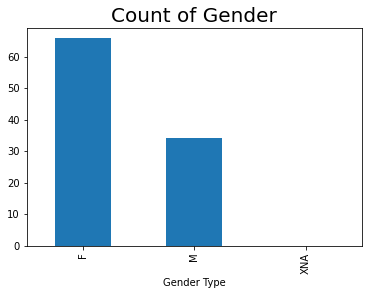

In [ ]:
# Which gender took most loan

gender_info = App_df['CODE_GENDER'].value_counts(normalize=True)*100
gender_info.plot(kind = 'bar')
plt.title("Count of Gender", size = 20)
plt.xlabel("Gender Type")
plt.show()  

In [ ]:
# Now using NAME_CONTRACT_TYPE we will check loan count

App_df['NAME_CONTRACT_TYPE'].value_counts() 

Cash loans         223889
Revolving loans     23423
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
sns.countplot(App_df['NAME_CONTRACT_TYPE'])
plt.title('Count of contract Type',size=20)
plt.show()

In [ ]:

# Lets check Annual Income of candidates who applied for loan

App_df['AMT_INCOME_TOTAL'].describe()

count    2.473120e+05
mean     1.688828e+05
std      2.597364e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.466798e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
# Analysing thhe Income Type of the individuals

App_df['NAME_INCOME_TYPE'].value_counts()

Working                 127783
Commercial associate     57475
Pensioner                44542
State servant            17466
Unemployed                  20
Student                     14
Businessman                  8
Maternity leave              3
Sta                          1
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(x = 'NAME_INCOME_TYPE',data=App_df, hue = 'TARGET')
plt.title("Income Type vs Target")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Analysing the DAYS_BIRTH column
App_df['DAYS_BIRTH'].head()


0    -9461.0
1   -16765.0
2   -19046.0
3   -19005.0
4   -19932.0
Name: DAYS_BIRTH, dtype: float64

In [ ]:

App_df['AGE'] = App_df['DAYS_BIRTH']//365
App_df['AGE'].value_counts().head()

-38.0    7126
-39.0    7121
-40.0    7017
-41.0    6956
-37.0    6942
Name: AGE, dtype: int64

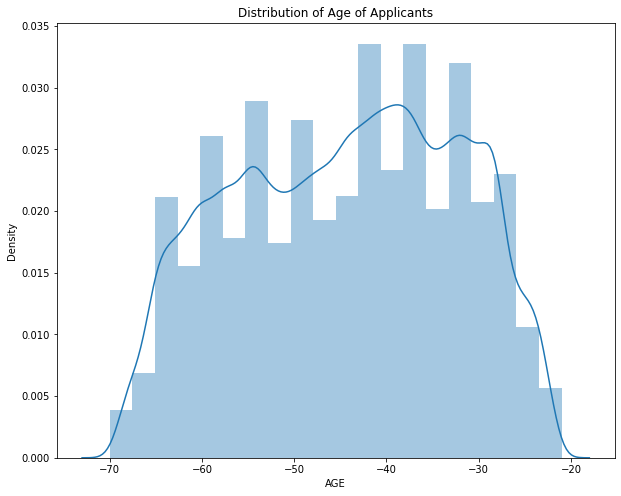

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(App_df['AGE'],bins = 20)
plt.title("Distribution of Age of Applicants")
plt.show()

In [ ]:
App_df['NAME_EDUCATION_TYPE'].head()

0    Secondary / secondary special
1                 Higher education
2    Secondary / secondary special
3    Secondary / secondary special
4    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

In [ ]:
App_df['NAME_EDUCATION_TYPE'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

In [ ]:

Education  = {'Secondary / secondary special':'Secondary', 'Higher education':'Higher Edu','Incomplete higher' :"Inc Higher", 'Lower secondary':'Lower secondary', 'Academic degree':'Degree'}

In [ ]:

App_df['NAME_EDUCATION_TYPE'] = App_df['NAME_EDUCATION_TYPE'].map(Education)

In [ ]:
plt.figure(figsize=(8,5))
App_df['NAME_EDUCATION_TYPE'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Education of Applicants")
plt.xlabel("Education Type")
plt.show()

In [ ]:
# Analysing Target variable
App_df['TARGET'].head() 

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [ ]:
App_df['TARGET'].value_counts()

0    227264
1     20048
Name: TARGET, dtype: int64

In [ ]:
App_df['TARGET'].value_counts(normalize = True).plot(kind = 'bar')
plt.title("Number of repaid with issues")
plt.show()

In [ ]:
#Client paying on time indicated by zero


(App_df['TARGET']==0).sum()

227264

In [ ]:
#client with payment difficulties indicated by 1

(App_df['TARGET']==1).sum()

20048

In [ ]:
App_df['TARGET'].sample(15)

80081     1
243574    1
204986    0
225271    0
29332     0
243761    0
237281    0
239269    0
203480    0
69070     0
181260    0
177931    0
67276     0
113190    0
193539    0
Name: TARGET, dtype: int64

In [ ]:
App_df['TARGET'].value_counts()

0    227264
1     20048
Name: TARGET, dtype: int64

In [ ]:


r = (App_df['TARGET']==0).sum() / (App_df['TARGET']==1).sum()
r = round(r)
r

print( 'The Ratio between Repayments and issue payments is  ' + str(r))

The Ratio between Repayments and issue payments is  11


In [ ]:
# Seperating imbalances by 0 and 1

train_0 = App_df.loc[App_df['TARGET'] == 0 ]
train_1 = App_df.loc[App_df['TARGET'] == 1 ]

In [ ]:
Cat_columns = list(set(App_df.columns) - set(App_df.describe().columns))
Cat_columns

['ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'FONDKAPREMONT_MODE',
 'NAME_HOUSING_TYPE']

In [ ]:
num_col = App_df.describe().columns
num_col
len(num_col)

107

In [ ]:
#Univariate analysis

def plotting(train, train0, train1, column):
    
    train = train
    train_0=train0
    train_1=train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x=column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(223)
    App_df=pd.DataFrame()
    
    
    App_df['0'] = ((train_0[col].value_counts())/len(train_0))
    App_df['1'] = ((train_1[col].value_counts())/len(train_1))
    App_df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    fig.tight_layout() #or equivalently, "plt.tight_Layout()"
    
    plt.show()

In [ ]:
#string values are categorical values

train_categorical = App_df.select_dtypes(include =['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

Plotting  NAME_CONTRACT_TYPE


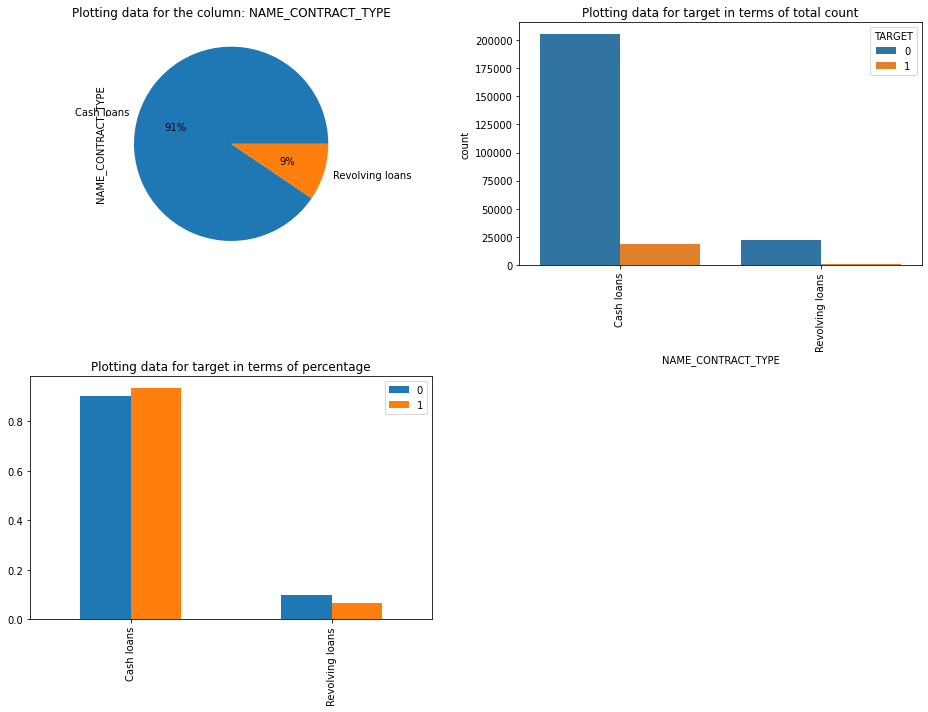

Plotting  CODE_GENDER


Plotting  FLAG_OWN_CAR


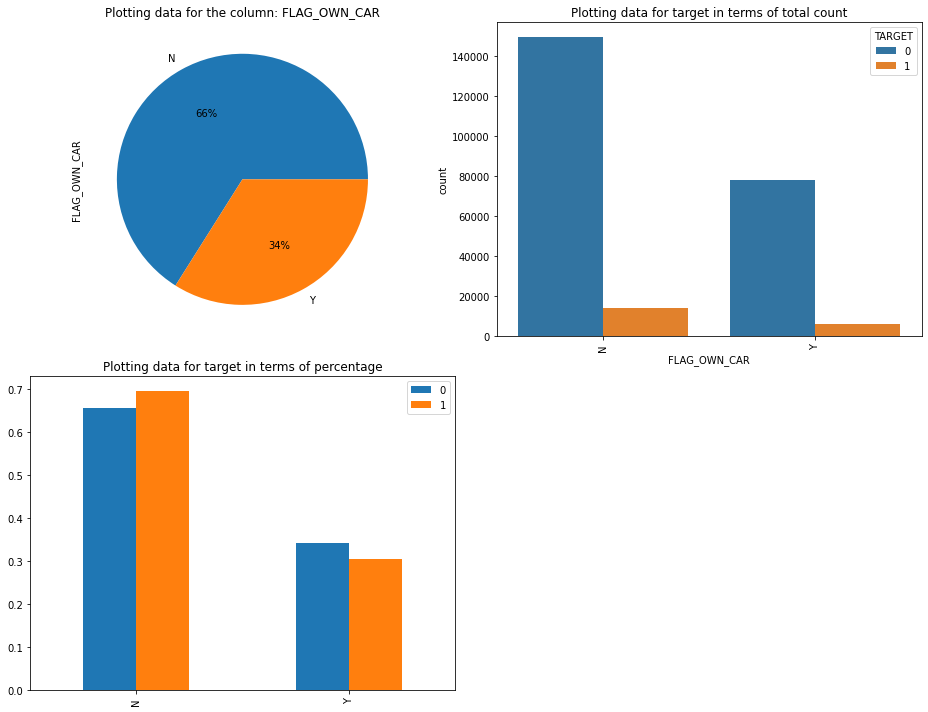

Plotting  FLAG_OWN_REALTY


Plotting  NAME_TYPE_SUITE


Plotting  NAME_INCOME_TYPE


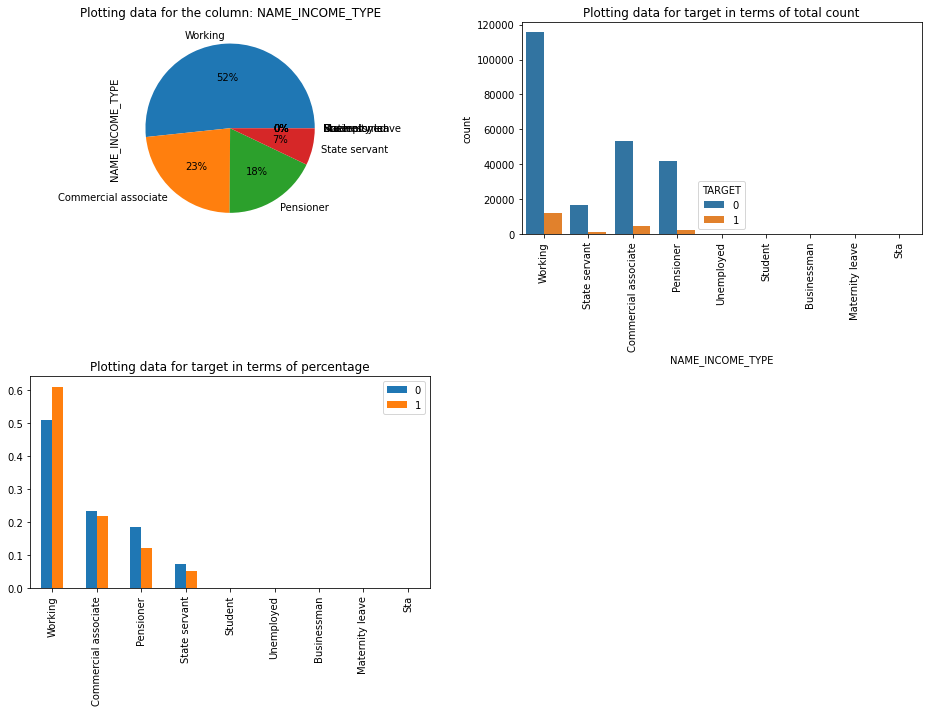

Plotting  NAME_EDUCATION_TYPE


Plotting  NAME_FAMILY_STATUS


Plotting  NAME_HOUSING_TYPE


Plotting  OCCUPATION_TYPE


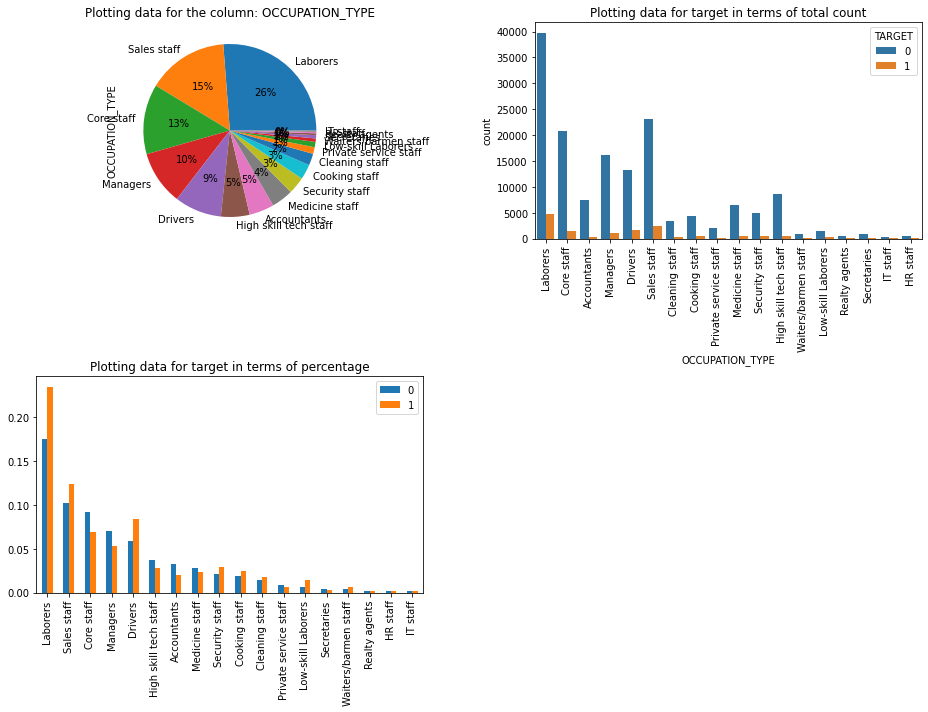

Plotting  WEEKDAY_APPR_PROCESS_START


Plotting  ORGANIZATION_TYPE


Plotting  FONDKAPREMONT_MODE


Plotting  HOUSETYPE_MODE


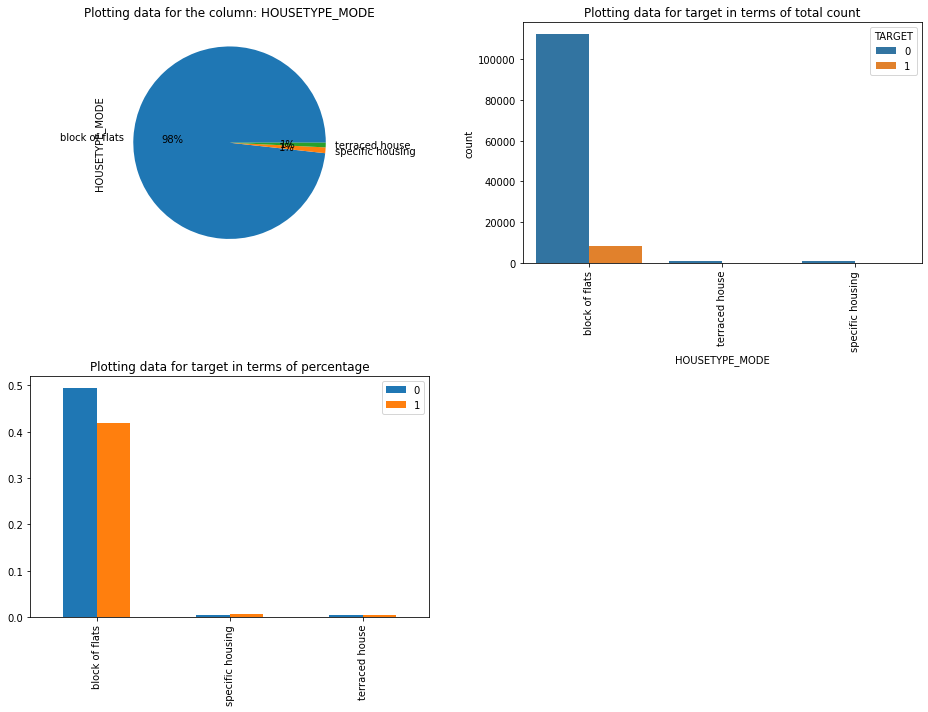

Plotting  WALLSMATERIAL_MODE


Plotting  EMERGENCYSTATE_MODE


In [ ]:
#univariate analysis of the categorical data

for column in train_categorical:
    print("Plotting ", column)
    plotting(App_df, train_0, train_1, column)

In [288]:
train_0.corr().shape


(107, 107)

In [289]:

#finding absolute values for further analysis

train_0.corr().abs()



SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.001133   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.001133     NaN      1.000000   
AMT_INCOME_TOTAL              0.002013     NaN      0.028339   
AMT_CREDIT                    0.003050     NaN      0.003145   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.006041     NaN      0.000008   
AMT_REQ_CREDIT_BUREAU_MON     0.000016     NaN      0.011602   
AMT_REQ_CREDIT_BUREAU_QRT     0.005225     NaN      0.006366   
AMT_REQ_CREDIT_BUREAU_YEAR    0.010207     NaN      0.040447   
AGE                           0.002349     NaN      0.336762   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.002013    0.003050     0.000356   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.028339    0.003145     0.022720   
AMT_INCOME_TOTAL                    1.000000    0.336418     0.413782   
AMT_CREDIT                          0.336418    1.000000     0.771139   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_WEEK          0.005872    0.001250     0.013286   
AMT_REQ_CREDIT_BUREAU_MON           0.061636    0.054455     0.038556   
AMT_REQ_CREDIT_BUREAU_QRT           0.012796    0.018368     0.012227   
AMT_REQ_CREDIT_BUREAU_YEAR          0.029752    0.048684     0.011747   
AGE                                 0.060634    0.048402     0.012867   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.003063                    0.000242   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                       0.000121                    0.023488   
AMT_INCOME_TOTAL                   0.343065                    0.165461   
AMT_CREDIT                         0.987211                    0.100585   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_WEEK         0.000786                    0.004105   
AMT_REQ_CREDIT_BUREAU_MON          0.056216                    0.076656   
AMT_REQ_CREDIT_BUREAU_QRT          0.018724                    0.002593   
AMT_REQ_CREDIT_BUREAU_YEAR         0.051196                    0.001030   
AGE                                0.045471                    0.026275   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_19  \
SK_ID_CURR                    0.002389       0.002795  ...          0.001090   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.336832       0.243604  ...          0.001147   
AMT_INCOME_TOTAL              0.060697       0.138723  ...          0.005870   
AMT_CREDIT                    0.048422       0.072311  ...          0.020639   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000301       0.001340  ...          0.000074   
AMT_REQ_CREDIT_BUREAU_MON     0.001736       0.035250  ...          0.002230   
AMT_REQ_CREDIT_BUREAU_QRT     0.010756       0.013635  ...          0.000139   
AMT_REQ_CREDIT_BUREAU_YEAR    0.072589       0.051907  ...          0.005050   
AGE                           0.999712       0.618106  ...          0.003968   

                            FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
SK_ID_CURR                          0.001388          0.000286   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.000834          0.002660   
AMT_INCOME_TOTAL                    0.000263          0.000239   
AMT_CREDIT                          0.030354          0.015551   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_WEEK          0.000799          0.00

In [290]:
train_0.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()

FLAG_MOBIL                  FLAG_DOCUMENT_12              0.000006
FLAG_DOCUMENT_12            FLAG_MOBIL                    0.000006
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN                  0.000008
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_WEEK    0.000008
FLAG_DOCUMENT_7             LIVINGAPARTMENTS_MODE         0.000009
                                                            ...   
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000
AGE                         AGE                           1.000000
Length: 11166, dtype: float64

In [291]:
correlation_0 = train_0.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()
correlation_0

FLAG_MOBIL                  FLAG_DOCUMENT_12              0.000006
FLAG_DOCUMENT_12            FLAG_MOBIL                    0.000006
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN                  0.000008
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_WEEK    0.000008
FLAG_DOCUMENT_7             LIVINGAPARTMENTS_MODE         0.000009
                                                            ...   
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000
AGE                         AGE                           1.000000
Length: 11166, dtype: float64

In [294]:
previous_application = pd.read_csv("previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [297]:
previous_train = App_df.merge(previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')

In [298]:
previous_train.shape # Checking shape of the new dataframe
previous_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100006       0           Cash loans           F            N   
1      100007       0           Cash loans           M            N   
2      100007       0           Cash loans           M            N   
3      100008       0           Cash loans           M            N   
4      100009       0           Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          135000.0      312682.5   
1               Y             0          121500.0      513000.0   
2               Y             0          121500.0      513000.0   
3               Y             0           99000.0      490495.5   
4               Y             1          171000.0     1560726.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        29686.5  ...                   XNA        48.0       low_normal   
1        21865.5  ...  Consumer electronics        18.0             high   
2        21865.5  ...                   XNA        48.0           middle   
3        27517.5  ...  Consumer electronics        10.0       low_normal   
4        41301.0  ...  Consumer electronics        12.0       low_action   

              PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0                Cash X-Sell: low           365243.0         -151.0   
1               Cash Street: high           365243.0         -834.0   
2             Cash X-Sell: middle                NaN            NaN   
3     POS household with interest           365243.0         -339.0   
4  POS household without interest           365243.0         -418.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                     1259.0         -151.0            -143.0   
1                     -324.0         -354.0            -347.0   
2                        NaN            NaN               NaN   
3                      -69.0          -69.0             -66.0   
4                      -88.0          -88.0             -84.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        0.0  
2                        NaN  
3                        0.0  
4                        0.0  

[5 rows x 159 columns]

In [299]:
previous_application.columns.value_counts().head()

SK_ID_PREV             1
CODE_REJECT_REASON     1
NAME_CLIENT_TYPE       1
NAME_GOODS_CATEGORY    1
NAME_PORTFOLIO         1
dtype: int64

In [302]:
train_0 = App_df.loc[App_df['TARGET'] == 0]
train_1 = App_df.loc[App_df['TARGET'] == 1]

In [ ]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

NameError: ignored